In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os, sys
pylibs =  ':/content/drive/My Drive/Colab_Notebooks/Severstal_CV_Task/python-libs'
os.environ['PYTHONPATH'] += pylibs
sys.path.append(pylibs[1:])
os.chdir("drive/My Drive/Colab_Notebooks/Severstal_CV_Task/training")

Mounted at /content/drive


In [ ]:
!pip install albumentations==0.4.6

In [ ]:
import tensorflow.keras.optimizers as keras_optimizers

from segmodel.training import train


width, height = 256, 256
n_classes = 4
batch_size = 8
model_num = 1
initial_epoch = 0
epochs = 600

train_augment_prob = .4

base_lr = 0.001 # reduce on plateau

# base_lr = 1e-6 # cyclic
max_lr = 0.002
class_weights = [.5, 1, 1, 1]
optimizer = keras_optimizers.Adam(base_lr)
# pretrain_model_path = 'checkpoints/model1/best_model.hdf5'
pretrain_model_path = None
train_img_arr_name = 'dataset1_train'
val_img_arr_name = 'dataset1_val'

print(f"Model {model_num}")
train(train_img_arr_name, val_img_arr_name, model_num, initial_epoch, epochs, train_augment_prob, batch_size,
      pretrain_model_path, optimizer, width, height, n_classes, base_lr, max_lr, class_weights)

In [2]:
import tensorflow.keras.optimizers as keras_optimizers

from segmodel.training import DATASET_DIR, ARR_FILE_FORMAT, get_transforms, BatchGenerator, compile_model, sm
from pylibs.keras.lr_finder import LRFinder

width, height = 256, 256
n_classes = 4
batch_size = 8
train_augment_prob = .4
start_lr = 1e-7
end_lr = 1.
epochs = 3
class_weights = [.5, 1, 1, 1]
# class_weights = [.1, 1, .25, .25]
optimizer = keras_optimizers.Adam(start_lr)
train_img_arr_name = 'dataset1_train'
transform_list = get_transforms(height, width)

img_arr_path = DATASET_DIR / (ARR_FILE_FORMAT % train_img_arr_name)
mask_arr_path = DATASET_DIR / (ARR_FILE_FORMAT % (train_img_arr_name + '_masks'))
train_gen = BatchGenerator(img_arr_path, mask_arr_path, batch_size, transform_list, train_augment_prob, seed=42)

# create model
backbone = 'resnext101'
model = sm.Unet(backbone, classes=n_classes, activation='softmax')

compile_model(model, optimizer, class_weights)

lr_finder = LRFinder(model)
lr_finder.find_generator(train_gen, start_lr, end_lr, epochs, batch_size=batch_size)

Segmentation Models: using `keras` framework.
Epoch 1/3
56/56 [==============================] - 31s 560ms/step - loss: 0.9919 - iou_score: 0.0049 - f1-score: 0.0097 - precision: 0.0059 - recall: 0.1315
Epoch 2/3
56/56 [==============================] - 31s 552ms/step - loss: 0.9352 - iou_score: 0.0557 - f1-score: 0.0694 - precision: 0.2861 - recall: 0.1699
Epoch 3/3
56/56 [==============================] - 31s 556ms/step - loss: 0.8647 - iou_score: 0.0747 - f1-score: 0.0897 - precision: 0.7396 - recall: 0.1026


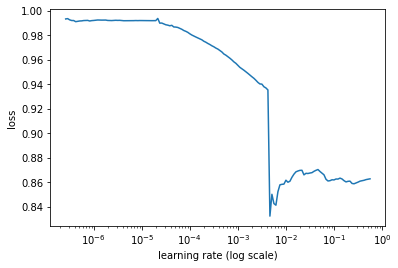

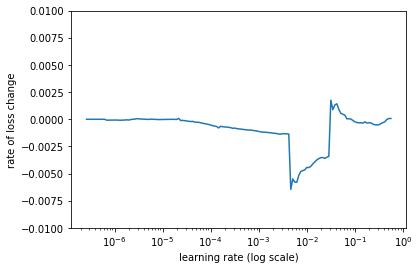

In [3]:
lr_finder.plot_loss()
lr_finder.plot_loss_change(sma=20, y_lim=(-0.01, 0.01))

In [4]:
import numpy as np

In [5]:
derivatives = lr_finder.get_derivatives(20)
lrs = lr_finder.lrs
np.array(derivatives).argmin()

112

In [8]:
base_i = 100
l, r = base_i, base_i + 20
lr_finder.losses[l:r], lrs[l:r], derivatives[l:r]

([0.9500885009765625,
  0.9487895369529724,
  0.9473543167114258,
  0.9460349082946777,
  0.9447470903396606,
  0.9431548118591309,
  0.941413402557373,
  0.9401509165763855,
  0.9399875402450562,
  0.9378623366355896,
  0.9368854761123657,
  0.9352420568466187,
  0.8322030901908875,
  0.8500181436538696,
  0.8424355983734131,
  0.8411267399787903,
  0.8521285057067871,
  0.8577713966369629,
  0.8581680655479431,
  0.8583446145057678],
 [0.0014677991,
  0.0016155979,
  0.0017782792,
  0.0019573416,
  0.0021544346,
  0.0023713736,
  0.002610157,
  0.0028729846,
  0.0031622774,
  0.0034807003,
  0.0038311866,
  0.004216965,
  0.004641589,
  0.0051089698,
  0.0056234132,
  0.0061896583,
  0.006812921,
  0.0074989423,
  0.008254042,
  0.009085176],
 [-0.0012068867683410645,
  -0.0012211620807647706,
  -0.0012503713369369507,
  -0.0012644052505493164,
  -0.0012876659631729126,
  -0.0013147056102752685,
  -0.00136072039604187,
  -0.0013675332069396974,
  -0.00131453275680542,
  -0.0013369649